# Приоритизация гипотез и анализ результатов А/B-теста

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Анализ-кумулятивной-выручки-по-группам" data-toc-modified-id="Анализ-кумулятивной-выручки-по-группам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ кумулятивной выручки по группам</a></span></li><li><span><a href="#Анализ-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="Анализ-кумулятивного-среднего-чека-по-группам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ кумулятивного среднего чека по группам</a></span></li><li><span><a href="#Анализ-кумулятивной-конверсии-по-группам" data-toc-modified-id="Анализ-кумулятивной-конверсии-по-группам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ кумулятивной конверсии по группам</a></span></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Анализ-статистической-значимости-различий-в-конверсии-и-в-среднем-чеке" data-toc-modified-id="Анализ-статистической-значимости-различий-в-конверсии-и-в-среднем-чеке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ статистической значимости различий в конверсии и в среднем чеке</a></span></li></ul></li><li><span><a href="#Решение-по-результатам-теста" data-toc-modified-id="Решение-по-результатам-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Решение по результатам теста</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li></ul></div>

**Вместе с отделом маркетинга нами подготовлен список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.**

## Предобработка данных

Для начала импортируем все библиотеки, которые потребуются нам в дальнейшей работе:

In [1]:
import pandas as pd 
import datetime as dt 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters 
import warnings 
register_matplotlib_converters() 
from matplotlib.pyplot import figure 
import scipy.stats as stats

Прочитаем файл с гипотезами по увеличению выручки нашего интернет-магазина:

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') # чтение файла с данными и сохранение в hypothesis
pd.set_option('max_colwidth', -1) # отображение не усеченной формы каждого столбца
hypothesis

/tmp/ipykernel_230/3747691890.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1) # отображение не усеченной формы каждого столбца


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для предстоящего знакомства с двумя более крупными файлами объявим функцию `data_info()`, которая будет включать запрос информации о таблице (`info()`), вывод первых пяти её строк (`head()`) и количества в ней дубликатов (`duplicated().sum()`):

In [3]:
# объявление функции data_info() принимающей в качестве параметра таблицу data
def data_info(data):
    head = display(data.head())   # получение первых 5 строк таблицы
    info = data.info()   # получение информации о данных в таблице 
    duplicates = print('\n' + 'Количество дубликатов:', data.duplicated().sum())   # получение кол-ва дубликатов в таблице
    return data, head, info, duplicates

In [4]:
orders = pd.read_csv('/datasets/orders.csv') # чтение файла с данными и сохранение в orders

orders, head, info, duplicates = data_info(orders) # передача функции data_info() orders в качестве аргумента

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Количество дубликатов: 0


In [5]:
visitors = pd.read_csv('/datasets/visitors.csv') # чтение файла с данными и сохранение в visitors

visitors, head, info, duplicates = data_info(visitors) # передача функции data_info() visitors в качестве аргумента

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Количество дубликатов: 0


In [6]:
visitors.query('group == "B" and date == "2019-08-01"')

,date,group,visitors
31,2019-08-01,B,713


Из обнаруженных проблем: 
- некорректные наименования у столбцов `transactionId` и `visitorId` в таблице `orders`; 
- колонки с датами `date` в обеих таблицах имеют тип данных `object`. 

Приведём названия столбцов к змеиному регистру и изменим тип данных в `date` на `datetime`:

In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
orders_A = orders[orders['group'] == 'A']  # создание таблицы с клиентами группы А
orders_B = orders[orders['group'] == 'B'] # создание таблицы с клиентами группы В
orders_AB = orders_A.merge(orders_B, on='visitor_id', how='inner') # объединение таблиц по общему visitor_id
orders_AB['visitor_id'].nunique() # подсчет кол-ва уникальных значений visitor_id

58

In [9]:
orders_AB = orders_AB['visitor_id'].unique() # создание списка уникальных наименований visitor_id из orders_AB
orders = orders.query('visitor_id not in @orders_AB').reset_index(drop=True) # исключение этих клиентов из orders

In [10]:
print('Количество пользователей в группе А:', orders[orders['group'] == 'A']['visitor_id'].nunique())
print('Количество пользователей в группе В:', orders[orders['group'] == 'B']['visitor_id'].nunique())

Количество пользователей в группе А: 445
Количество пользователей в группе В: 528


## Приоритизация гипотез

Теперь посчитаем приоритеты по гипотезам на основании имеющихся оценок параметров. Определим ICE:

In [11]:
# создание столбца ICE с результатами расчётов по каждой гипотезе
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True).style.format({'ICE': '{:.2f}'})

,Hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно расчета `ICE`, самые перспективные гипотезы: 
- Запустить акцию, дающую скидку на товар в день рождения,
- Добавить два новых канала привлечения трафика,
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Теперь посчитаем `RICE`:

In [12]:
# создание столбца RICE с результатами расчётов по каждой гипотезе
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)

,Hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [13]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
hypothesis[['Hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True).style.format({'ICE': '{:.2f}'}).apply(highlight_max, props='color:white;background-color:darkblue', axis=0, subset=['RICE', 'ICE'])

,Hypothesis,RICE,ICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.20
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.00
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.33
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.00
4,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.20
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.12
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.00
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.33
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.00


По результатам `RICE` дальше всех вперёд выбивается гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**, что логично - показатель `Reach` равен 10, так как изменение затронет всех пользователей нашего интернет-магазина. `Impact` и `Confidence` у этой гипотезы тоже выше среднего, а траты на её тестирование не столь высоки.

А вот лидер `ICE` **"Запустить акцию, дающую скидку на товар в день рождения"** при подсчете `RICE` сильно потерял свои позиции, так как имеет минимальный показатель `Reach` - это нововведение коснётся лишь небольшого процента именинников и при остальных преимуществах (высокие `Impact` и `Confidence`) не столь целесообразно.

## Анализ A/B-теста

Проанализируем имеющиеся у нас результаты A/B-теста.

### Анализ кумулятивной выручки по группам

Оценим кумулятивную (накапливаемую) выручку по обеим группам. Для этого сначала соберём кумулятивные данные в таблицу `cumulativeData`:

In [14]:
# создание уникальных пар дата-группа
datesGroups = orders[['date', 'group']].drop_duplicates()

# получение агрегированных кумулятивных данных о заказах по дням
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получение агрегированных кумулятивных данных о посетителях по дням
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединение ordersAggregated и visitorsAggregated
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date','group'])

# переименование столбцов
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Теперь, когда кумулятивные данные собраны в одной таблице, можно переходить к анализу выручки по группам A/B-тестирования. Выделим в отдельные датафреймы данные с кумулятивным количеством заказов и кумулятивной выручкой в каждой группе:

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим графики кумулятивной выручки обеих групп:

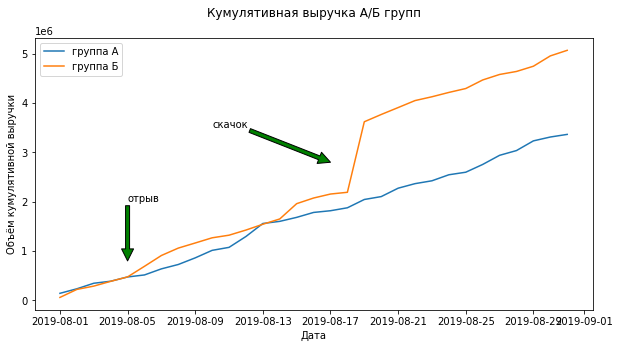

In [16]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа Б')
plt.xlabel('Дата')
plt.ylabel('Объём кумулятивной выручки')
plt.title('Кумулятивная выручка А/Б групп' + '\n')
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))
plt.legend();

Первые несколько дней кумулятивная выручка обеих групп увеличивалась равномерно, далее выручка группы "В" начала расти увереннее, чем у группы "А", а **19-го августа выручка группы "В" сделала резкий скачок** и, таким образом, в дальнейшем существенно опередила группу "А". Это может говорить нам о всплеске числа заказов в группе "В", либо о наличии в выборке очень дорогих заказов.

С 5 августа у группы "А" наблюдается небольшой спад и последовавший за ним некоторый всплеск 13-го августа.

### Анализ кумулятивного среднего чека по группам

Посмотрим, как обстоят дела с кумулятивным средним чеком:

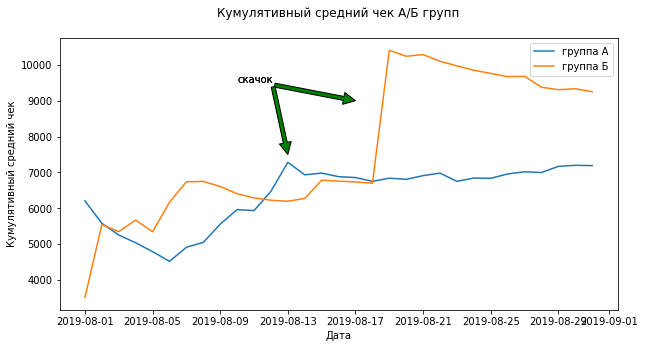

In [17]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа Б')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек А/Б групп' + '\n')
plt.annotate('скачок', xy=('2019-08-17', 9000), xytext=('2019-08-10', 9500),
            arrowprops=dict(facecolor='g'))
plt.annotate('скачок', xy=('2019-08-13', 7500), xytext=('2019-08-10', 9500),
            arrowprops=dict(facecolor='g'))
plt.legend();

Здесь мы тоже наблюдаем, что 19-го августа в группе "В" произошла аномально дорогостоящая покупка, после чего средний чек постепенно выравнивается. Уровень среднего чека для группы "А" установился уже с 14-го августа, после скачка от 13-го августа.

Оценим **относительное изменение кумулятивного среднего чека группы "B" к группе "A"**. Для этого соберем данные в одном датафрейме `mergedCumulativeRevenue`, объединив `cumulativeRevenueA` и `cumulativeRevenueB` и добавив наименованиям столбцов соответствующие суффиксы:

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])

Теперь построим график относительного различия для среднего чека: 

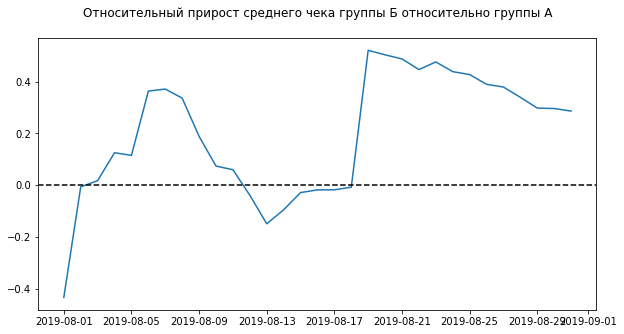

In [19]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("Относительный прирост среднего чека группы Б относительно группы A" + '\n')
plt.axhline(y=0, color='black', linestyle='--');

В выборке очевидны выбросы и аномалии, так как график различия между сегментами резко «скачет» в нескольких местах.

### Анализ кумулятивной конверсии по группам

Аналогичным образом проанализируем кумулятивную конверсию по группам. Поэтому в нашей основной таблице `cumulativeData` создадим столбец `conversion` с показателем конверсии и получившийся датафрейм разделим на две таблицы с данными по каждой группе:

In [20]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график:

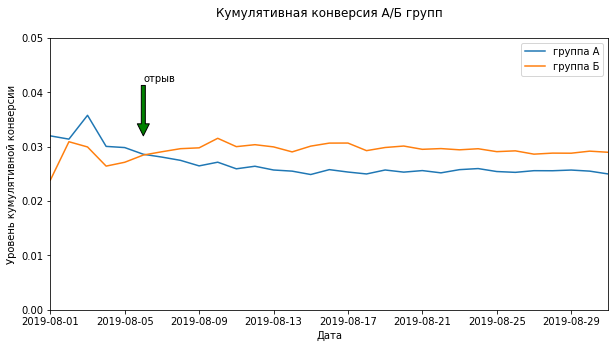

In [21]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа Б')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.title("Кумулятивная конверсия А/Б групп" + '\n')
plt.annotate('отрыв', xy=('2019-08-06', 0.032), xytext=('2019-08-06', 0.042),
            arrowprops=dict(facecolor='g'))
plt.xlabel('Дата')
plt.ylabel('Уровень кумулятивной конверсии');

Первые несколько дней конверсия группы "А" была лучше, но 6 августа конверсия группы "В" вырвалась вперёд и зафиксировалась, а конверсия группы "А" просела и также зафиксировалась.

Посмотрим на **относительное изменение кумулятивной конверсии группы "B" к группе "A"**. Сначала объединим `cumulativeDataA` и `cumulativeDataB` в датафрейм `mergedCumulativeConversions`:

In [22]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

И изучим информацию на графике:

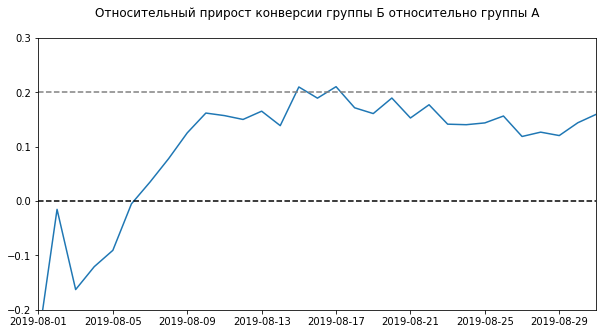

In [23]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title("Относительный прирост конверсии группы Б относительно группы A" + '\n')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]);

Конверсия группы "B" несколько проигрывала группе "A" только до 6 августа, затем вырвалась вперёд и неизменно удерживалась "в плюсе" относительно группы "А".

### Анализ выбросов и всплесков

Уже изученные нами графики продемонстрировали, что в выборке есть аномалии и выбросы. Посмотрим, сколько заказов приходится на одного клиента, для этого сгруппируем таблицу `orders` следующим образом:

In [24]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsers.columns = ['visitor_id', 'orders']

Построим точечную диаграмму числа заказов на одного пользователя:

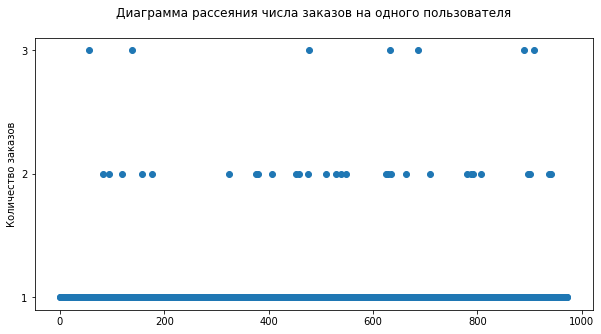

In [25]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
y_values = ordersByUsers['orders']
plt.scatter(x_values, y_values)
plt.yticks([1, 2, 3])
plt.title("Диаграмма рассеяния числа заказов на одного пользователя" + '\n')
plt.ylabel('Количество заказов');

На диаграмме видно, что чаще всего клиенты делают от 1 заказ, реже - 2, ещё реже - 3. Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Итак, не более 1% пользователей оформляли больше двух заказов.**

Поищем выбросы в стоимости заказов. Посмотрим на распределение стоимости заказов на точечной диаграмме:

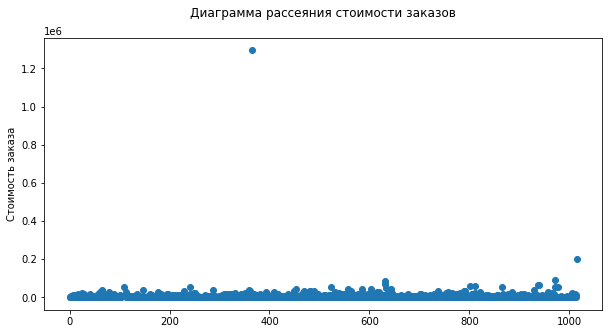

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.title("Диаграмма рассеяния стоимости заказов" + '\n')
plt.ylabel('Стоимость заказа');

Вот и обнаружилась та самая дорогостоящая покупка (дороже 1.2 млн рублей!), которая провоцировала скачки на графиках анализа кумулятивных данных. Основная же часть заказов обходится нашим клиентам до 100 000 рублей. Посчитаем 95-й и 99-й выборочные перцентили выручки:

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Так и есть - только 1 процент клиентов покупают что-то дороже 54 000 рублей. **Базовый, нормальный показатель выручки - до 30 000 рублей.**

### Анализ статистической значимости различий в конверсии и в среднем чеке

Для начала оценим статистическую значимость различий в конверсии и в среднем чеке по "сырым" данным.

Соберем сводную таблицу `data` со всеми необходимыми данными:

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` - в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули:

In [31]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Перед нами стоит задача проверить гипотезу о равенстве конверсий двух групп в "сырых" данных.

**Нулевая гипотеза в данном случае будет звучать так: "Конверсия группы А равна конверсии группы В".**

Альтернативная гипотеза: "Конверсия группы А не равна конверсии группы В".

Применив тест Манна-Уитни, посчитаем статистическую значимость различия конверсий:

In [32]:
alpha = 0.05  # задаём критический уровень статистической значимости

print('Статистическая значимость различия конверсий по "сырым" данным: ', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if (stats.mannwhitneyu(sampleA, sampleB)[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистическая значимость различия конверсий по "сырым" данным:  0.011
Отвергаем нулевую гипотезу


**В конверсии между группами присутствуют статистически значимые различия**. 

Выведем относительный прирост конверсии группы B:

In [33]:
print('Относительный прирост конверсии группы B в "сырых" данных:', '{0:.2f}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы B в "сырых" данных: 0.16


**Относительный выигрыш группы "B" равен 16%.**

Теперь проверим гипотезу о равенстве средних чеков двух групп.

**Нулевая гипотеза такова: "Средний чек пользователей группы А равен среднему чеку пользователей группы В".**

Альтернативная гипотеза: "Средний чек пользователей группы А не равен среднему чеку пользователей группы В".

Рассчитаем статистическую значимость различий в среднем чеке между сегментами:

In [34]:
print('Статистическая значимость различий в среднем чеке в "сырых" данных: ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

if (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистическая значимость различий в среднем чеке в "сырых" данных:  0.829
Не получилось отвергнуть нулевую гипотезу


**Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.** 

Найдём относительные различия в среднем чеке между группами:

In [35]:
print('Относительные различия в среднем чеке между группами по "сырым" данным:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительные различия в среднем чеке между группами по "сырым" данным: 0.287


**Средний чек группы "B" значительно выше среднего чека группы "A"** - очевидно, из-за известной нам дорогой покупки за пределами миллиона рублей.

Теперь исключим выбросы и оценим статистическую значимость различий в конверсии и в среднем чеке уже по "очищенным" данным. Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём от 1% до 5% пользователей с наибольшим числом заказов и самыми дорогими покупками. 

Сделаем срезы пользователей с числом заказов больше 2 в `usersWithManyOrders` и пользователей, совершивших заказы дороже 30 000, в `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`:

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Создадим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах, не включая аномальных пользователей:

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посмотрим на статистическую значимость различия конверсии в "очищенных" данных.

Напомним, что нулевая гипотеза звучит следующим образом: **"Конверсия группы А равна конверсии группы В".**

Альтернативная: "Конверсия группы А не равна конверсии группы В".

In [38]:
print('Статистическая значимость различия конверсий в "очищенных" данных: ', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистическая значимость различия конверсий в "очищенных" данных:  0.010
Отвергаем нулевую гипотезу


В "сырых" данных было 0.006 - значение почти не изменилось. Нулевая гипотеза отвергнута и **в конверсии между группами есть существенные различия**. 

In [39]:
print('Относительный прирост конверсии группы "B" в "очищенных" данных:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительный прирост конверсии группы "B" в "очищенных" данных: 0.187


Прирост 18.7% (в "сырых" - 16%)

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

**Нулевая гипотеза: "Средний чек пользователей группы А равен среднему чеку пользователей группы В".**

Альтернативная: "Средний чек пользователей группы А не равен среднему чеку пользователей группы В".

In [40]:
result = stats.mannwhitneyu(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'],
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'],
    )[1]

print('Статистическая значимость различий в среднем чеке по "очищенным" данным: ', '{0:.3f}'.format(result))
if (result < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Статистическая значимость различий в среднем чеке по "очищенным" данным:  0.741
Не получилось отвергнуть нулевую гипотезу



**Нулевую гипотезу отвергать нельзя - в среднем чеке различий нет.**

Выведем относительный прирост среднего чека очищенной группы "B":

In [41]:
print('Относительный прирост конверсии группы B по "очищенным" данным:', '{0:.3f}'.format(
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    / orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    - 1
))

Относительный прирост конверсии группы B по "очищенным" данным: -0.027


До "очищения" данных средний чек группы "B" был выше среднего чека группы "A" почти на 29%. **После того, как мы отбросили аномально большие значения, средние чеки групп практически уровнялись.**

## Решение по результатам теста

По проведённому тесту мы можем сделать следующие выводы:
- по конверсии между группами обнаружены статистически значимые различия как по «сырым» данным, так и по данным после исключения аномалий;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- график различия конверсии между группами сообщает, что результаты группы "B" стабильно лучше группы "A";
- график различия среднего чека колеблется из-за имеющихся аномалий. Сделать из этого графика определённые выводы нельзя.

**Исходя из обнаруженных фактов, тест следует остановить и признать его успешным в пользу группы "В".**
Хоть показатели среднего чека у обеих групп не отличаются, группа "В" демонстрирует лучшую конверсию.

## Общий вывод по проекту

**В ходе работы мы приоритизировали имеющиеся гипотезы, проанализировали результаты A/B-теста и пришли к следующим выводам:**
- на этапе предобработки данных было обнаружено **58 пользователей, которые вошли одновременно в обе группы тестирования** - для корректности результатов, информация по этим клиентам не была включена в анализ, данное обстоятельство стоит учесть при проведении A/B-тестов в будущем;
- также выявлено, что **в группах не равное количество пользователей** - в будущих A/В-тестах стоит обратить на это внимание;
- процесс приоритизации гипотез методом RICE показал, что среди гипотез самая перспективная - **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** с высокими показателями охвата, влияния и уверенности в эффекте;
- в ходе исследования результатов А/В-теста мы произвели анализ кумулятивной выручки по группам, кумулятивного среднего чека, кумулятивной конверсии, статистической значимости различий в конверсии и среднем чеке, а также выявили и исключили из выборки выбросы и аномалии. Проведённая работа показала **успех в пользу группы В**: средние чеки в обеих группах приблизительно равны, но конверсия среди пользователей группы В стабильно лучше группы A. Эти выводы позволяют утверждать, что тест успешен, и его можно остановить.